In [44]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import wandb
from wandb.keras import WandbCallback

config = {
            "learning_rate": 0.0004,
            "epochs": 10,
            "batch_size": 128,
            "dataset": "MINIST"
         }

In [45]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(train_X, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
train_X = train_X.astype("float32") / 255
test_x = test_x.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
train_X = np.expand_dims(train_X, -1)
test_x = np.expand_dims(test_x, -1)
print("train_X shape:", train_X.shape)
print(train_X.shape[0], "train samples")
print(test_x.shape[0], "test samples")


# convert class vectors to binary class matrices
train_y = tf.keras.utils.to_categorical(train_y, num_classes)
test_y = tf.keras.utils.to_categorical(test_y, num_classes)




train_X shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [46]:
# Build the model 
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
number_reading_model_1 = tf.keras.Sequential([

        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128,activation="relu"),  
        tf.keras.layers.Dense(num_classes, activation="softmax"),
])

number_reading_model_1.summary()

# Compile the model
number_reading_model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [47]:
# Create the learning rate callback
batch_size=config['batch_size']
epochs=config['epochs']
history_1 = number_reading_model_1.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
  1/422 [..............................] - ETA: 2:51 - loss: 2.3127 - accuracy: 0.1094

2022-05-30 19:57:02.647939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.9205

2022-05-30 19:57:09.085287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 7s 16ms/step - loss: 0.2620 - accuracy: 0.9205 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0836 - accuracy: 0.9736 - val_loss: 0.0500 - val_accuracy: 0.9865
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.0441 - val_accuracy: 0.9885
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0505 - accuracy: 0.9836 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 5/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0348 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 8/10

313/313 [==============================] - 2s 7ms/step - loss: 0.0248 - accuracy: 0.9916
Test loss: 0.02481253817677498
Test accuracy: 0.9916000366210938


(0.0, 0.1)

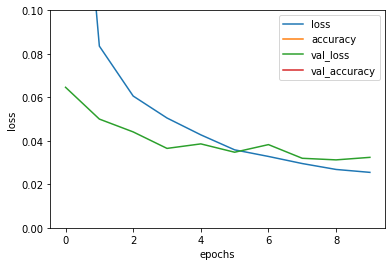

In [48]:

import pandas as pd
import matplotlib.pyplot as plt

number_reading_model_1.evaluate(test_x, test_y)
score = number_reading_model_1.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.ylim(0,.1)

In [49]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = number_reading_model_1.predict(test_x)
a = tf.math.argmax(y_preds,axis=1)
b = tf.math.argmax(test_y,axis=1)

cm = confusion_matrix(a,b)


2022-05-30 19:58:12.451368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


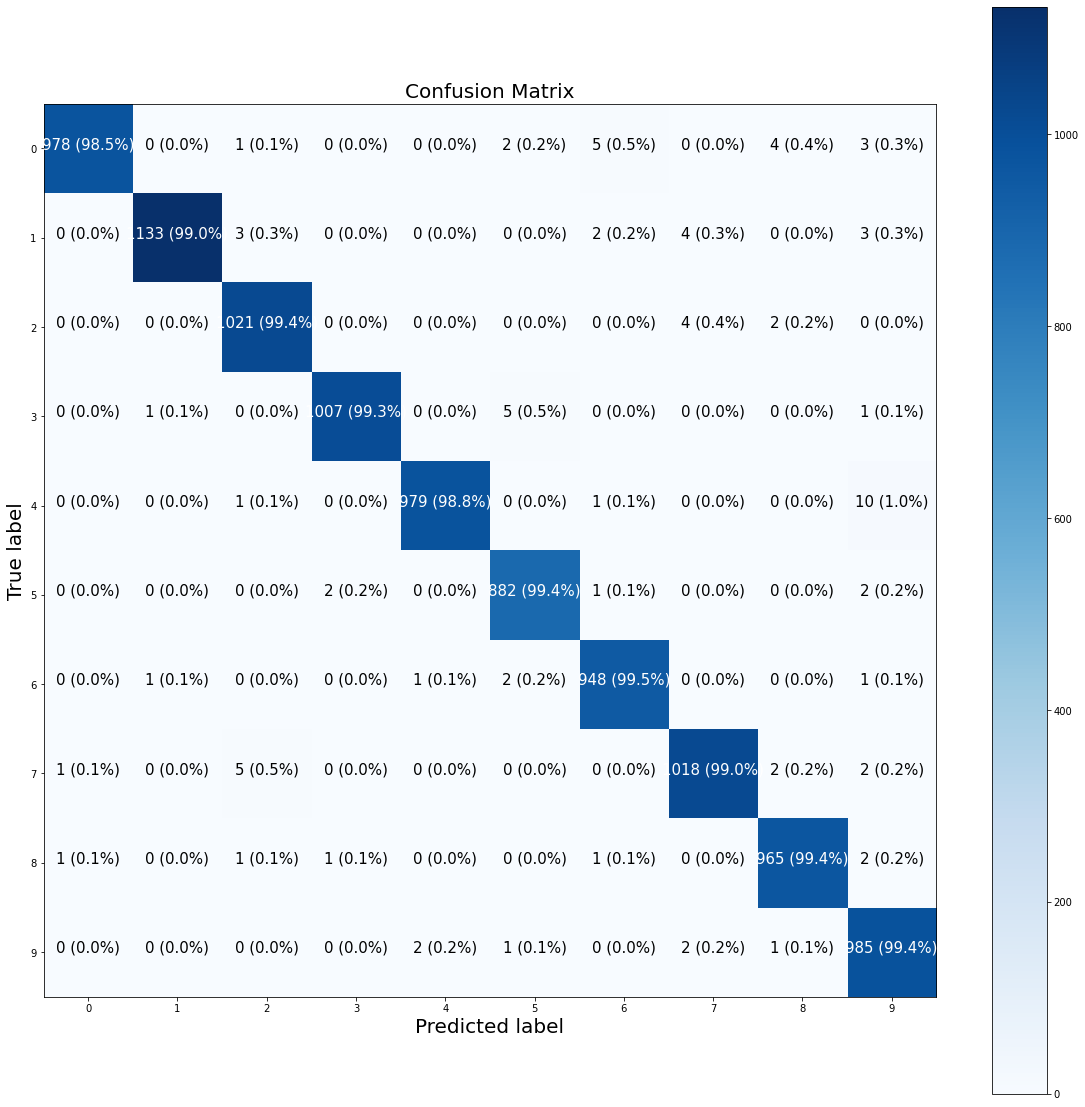

In [50]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (20, 20)

# Create the confusion matrix
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
# cm_norm = tf.math.log(c÷m_norm)
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)